<a href="https://colab.research.google.com/github/RafaBaker/estatistica/blob/main/Trabalho_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pandas
# !pip install seaborn
# !pip install beautifulsoup4
# !pip install requests

# **Constantes**

In [ ]:
BADGE_SIZE = 35
PL_COLOR_PALETTE = {
    'Red': '#F2055C',
    'Purple': '#340040',
    'Blue': '#07F2F2',
    'Green': '#05F26C',
    'Yellow': '#EAF205'
}
TEAM_COLOR_PALETTE = {
    'Arsenal': '#DB0007',
    'Liverpool': '#C8102E',
    'Chelsea': '#034694',
    'Tottenham': '#132257',
    'Man United': '#DA291C',
    'Newcastle': '#241F20',
    'Aston Villa': '#95bfe5',
    'Brighton': '#0057B8',
    'West Ham': '#7A263A',
    'Nott\'m Forest': '#DD0000',
    'Crystal Palace': '#1B458F',
    'Bournemouth': '#DA291C',
    'Brentford': '#e30613',
    'Wolves': '#FDB913',
    'Everton': '#003399',
    'Fulham': '#000000',
    'Ipswich': '#3a64a3',
    'Southampton': '#d71920',
    'Leicester': '#003090',
    'Man City': '#6CABDD',
}

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.ticker as mtick
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # prompt: como pegar os dados de um csv para depois manipulá-lo com pandas e seaborn?

# # Assuming the CSV file is named 'data.csv' and is in the current directory.
# # If your CSV is in Google Drive after mounting, you'll need to provide the full path.
# # For example: file_path = '/content/drive/My Drive/your_folder/data.csv'

# # file_path = 'E0.csv'
# file_path = '/content/drive/MyDrive/E0.csv'

# try:
#     # Load the CSV into a pandas DataFrame
#     df = pd.read_csv(file_path)

# except FileNotFoundError:
#     print(f"Error: The file '{file_path}' was not found.")
# except Exception as e:
#     print(f"An error occurred: {e}")

# file_id = '1UR_HlXuqeUL6Wr3HaFhSHjQi7Zz-KEh8'
# url = f'/content/drive/MyDrive/E0.csv'

url = f'https://raw.githubusercontent.com/RafaBaker/estatistica/refs/heads/main/E0.csv'
try:
    df = pd.read_csv(url)
    print("Dados carregados com sucesso!")
except Exception as e:
    print(f"Erro: peça acesso ao arquivo ao dono. Detalhes: {e}")

df

Dados carregados com sucesso!


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,E0,16/08/2024,20:00,Man United,Fulham,1,0,H,0,0,...,1.86,2.07,1.83,2.11,1.88,2.11,1.82,2.05,1.90,2.08
1,E0,17/08/2024,12:30,Ipswich,Liverpool,0,2,A,0,0,...,2.05,1.88,2.04,1.90,2.20,2.00,1.99,1.88,2.04,1.93
2,E0,17/08/2024,15:00,Arsenal,Wolves,2,0,H,1,0,...,2.02,1.91,2.00,1.90,2.05,1.93,1.99,1.87,2.02,1.96
3,E0,17/08/2024,15:00,Everton,Brighton,0,3,A,0,1,...,1.87,2.06,1.86,2.07,1.92,2.10,1.83,2.04,1.88,2.11
4,E0,17/08/2024,15:00,Newcastle,Southampton,1,0,H,1,0,...,1.87,2.06,1.88,2.06,1.89,2.10,1.82,2.05,1.89,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,25/05/2025,16:00,Newcastle,Everton,0,1,A,0,0,...,2.00,1.85,2.01,1.90,2.01,1.95,1.95,1.91,1.93,2.05
376,E0,25/05/2025,16:00,Nott'm Forest,Chelsea,0,1,A,0,0,...,1.80,2.05,1.86,2.08,1.86,2.08,1.81,2.05,1.86,2.14
377,E0,25/05/2025,16:00,Southampton,Arsenal,1,2,A,0,1,...,2.03,1.83,2.04,1.87,2.07,1.87,2.03,1.83,2.06,1.89
378,E0,25/05/2025,16:00,Tottenham,Brighton,1,4,A,1,0,...,1.95,1.90,2.00,1.93,2.01,1.93,1.95,1.89,2.06,1.93


## Formata dataframe, retirando as colunas das bets (e da divisão)

In [ ]:
 df.drop(columns=['Div','B365H','B365D','B365A','BWH','BWD','BWA','BFH',
                  'BFD','BFA','PSH','PSD','PSA','WHH','WHD','WHA',
                  '1XBH','1XBD','1XBA','MaxH','MaxD','MaxA','AvgH','AvgD','AvgA',
                  'BFEH','BFED','BFEA','B365>2.5','B365<2.5','P>2.5','P<2.5','Max>2.5',
                  'Max<2.5','Avg>2.5','Avg<2.5','BFE>2.5','BFE<2.5','AHh','B365AHH',
                  'B365AHA','PAHH','PAHA','MaxAHH','MaxAHA','AvgAHH','AvgAHA','BFEAHH',
                  'BFEAHA','B365CH','B365CD','B365CA','BWCH','BWCD','BWCA','BFCH','BFCD',
                  'BFCA','PSCH','PSCD','PSCA','WHCH','WHCD','WHCA','1XBCH','1XBCD','1XBCA',
                  'MaxCH','MaxCD','MaxCA','AvgCH','AvgCD','AvgCA','BFECH','BFECD','BFECA',
                  'B365C>2.5','B365C<2.5','PC>2.5','PC<2.5','MaxC>2.5','MaxC<2.5','AvgC>2.5',
                  'AvgC<2.5','BFEC>2.5','BFEC<2.5','AHCh','B365CAHH','B365CAHA','PCAHH','PCAHA',
                  'MaxCAHH','MaxCAHA','AvgCAHH','AvgCAHA','BFECAHH','BFECAHA'], inplace=True)


# **Finalizações**

In [ ]:
home_shots = df.groupby('HomeTeam')['HS'].sum().reset_index()
home_shots.columns = ['Team', 'HS']
away_shots = df.groupby('AwayTeam')['AS'].sum().reset_index()
away_shots.columns = ['Team', 'AS']
total_shots = pd.merge(home_shots, away_shots)
total_shots['Total_Shots'] = total_shots['HS'] + total_shots['AS']

total_shots = total_shots.sort_values(by='Total_Shots', ascending=False).reset_index(drop=True)

# total_shots

# **Chutes a gol**

In [ ]:
# Quantidade de chutes a gol
home_sot = df.groupby('HomeTeam')['HST'].sum().reset_index()
home_sot.columns = ['Team', 'HST']
away_sot = df.groupby('AwayTeam')['AST'].sum().reset_index()
away_sot.columns = ['Team', 'AST']
total_sot = pd.merge(home_sot, away_sot)
total_sot['Total_SOT'] = total_sot['HST'] + total_sot['AST']
top_sot = total_sot.sort_values(by='Total_SOT', ascending=True).reset_index(drop=True)

# Quantidade de jogos
home_games_count = df.groupby('HomeTeam').size().reset_index(name='Games')
home_games_count.columns = ['Team', 'HomeGames']
away_games_count = df.groupby('AwayTeam').size().reset_index(name='Games')
away_games_count.columns = ['Team', 'AwayGames']
all_games = pd.merge(home_games_count, away_games_count, on='Team')
all_games['TotalGames'] = all_games['HomeGames'] + all_games['AwayGames']

# Média de chutes por jogo
top_sot = pd.merge(top_sot, all_games)
top_sot['Avg_Total_SOT'] = round(top_sot['Total_SOT'] / top_sot['TotalGames'], 1)

all_shots = pd.merge(top_sot, total_shots)

#Média de finalizações (pq a quantidade de jogos ta aqui em baixo)
all_shots['Avg_Total_Shots'] = round(all_shots['Total_Shots'] / all_shots['TotalGames'], 1)
all_shots

# top_shots

df_melted = all_shots.melt(
    id_vars='Team',
    value_vars=['Avg_Total_Shots', 'Avg_Total_SOT'],
    var_name='Métrica',
    value_name='Valor'
)
# df_melted

## Plota gráfico chutes a gol

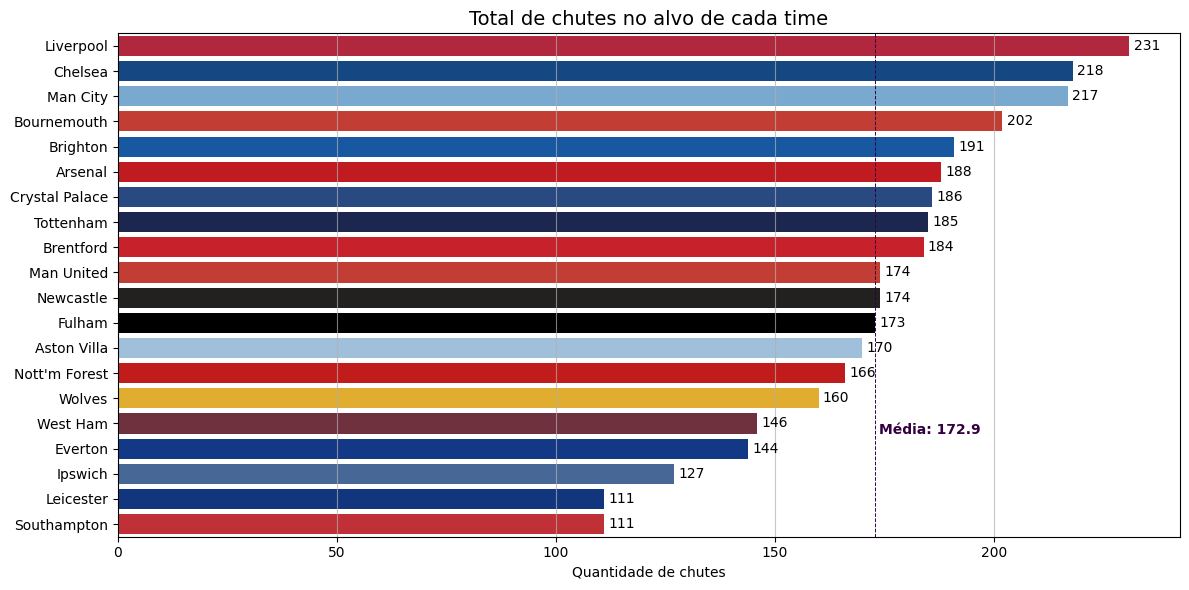

In [ ]:
all_shots = all_shots.sort_values(by='Total_SOT', ascending=False).reset_index(drop=True)

media = all_shots['Total_SOT'].mean()

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x='Total_SOT',
    y='Team',
    hue='Team',
    data=all_shots,
    palette=TEAM_COLOR_PALETTE,
    orient='h',
    legend=False
)

plt.grid(axis='x', linestyle='-', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

media = round(all_shots['Total_SOT'].mean(), 1)
color = PL_COLOR_PALETTE['Purple']
plt.text(media + 1, 15, f'Média: {media}', color=color, ha='left', va='top', fontsize=10, fontweight='bold')
plt.axvline(x=media, color=color, linestyle='--', linewidth=0.7, label='Média')

plt.title('Total de chutes no alvo de cada time', fontsize=14)
plt.xlabel('Quantidade de chutes')
plt.ylabel('')
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/graficos_estatistica/total_chutes_no_alvo.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

## Plota gráfico média de chutes ao alvo de cada time

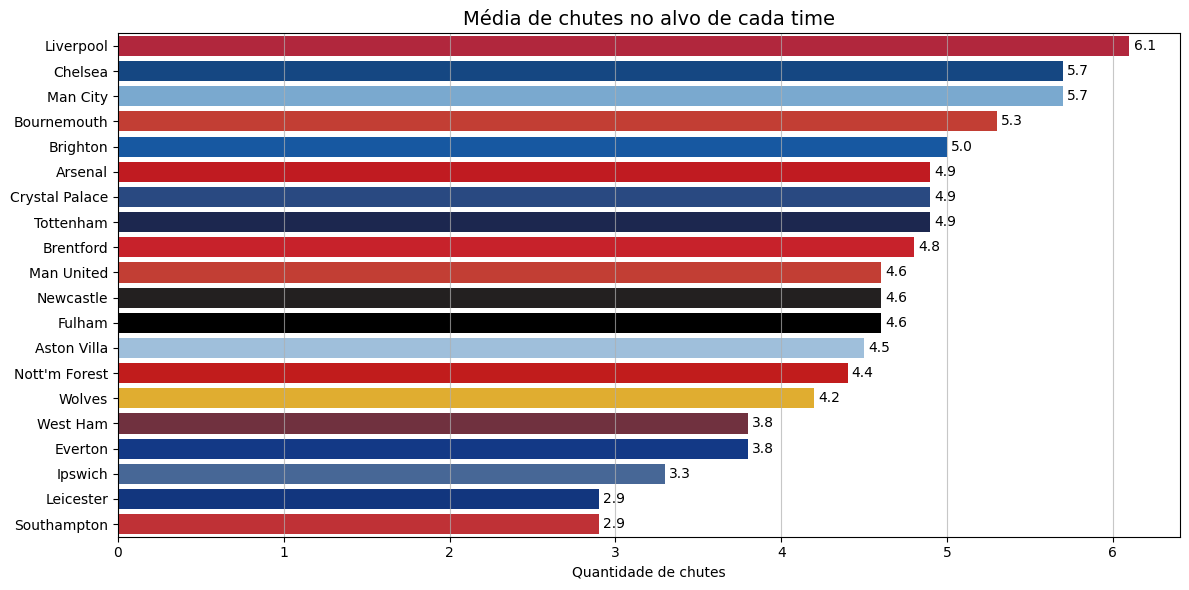

In [ ]:
all_shots = all_shots.sort_values(by='Avg_Total_SOT', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=all_shots,
    x='Avg_Total_SOT',
    y='Team',
    hue='Team',
    palette=TEAM_COLOR_PALETTE,
    orient='h',
    legend=False
)

plt.grid(axis='x', linestyle='-', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3, fontsize=10)

plt.title('Média de chutes no alvo de cada time', fontsize=14)
plt.xlabel('Quantidade de chutes')
plt.ylabel('')
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/graficos_estatistica/media_chutes_no_alvo.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
def lighten_color(hex_color, factor):
    rgb = mcolors.hex2color(hex_color)
    hsv = mcolors.rgb_to_hsv(rgb)
    lighter_hsv = (hsv[0], 1 - factor, hsv[2])
    lighter_rgb = mcolors.hsv_to_rgb(lighter_hsv)
    return mcolors.rgb2hex(lighter_rgb)

LIGHT_TEAM_PALETTE ={
    team: lighten_color(color, 0.3)
    for team, color in TEAM_COLOR_PALETTE.items()
}


# Plot barras empilhadas

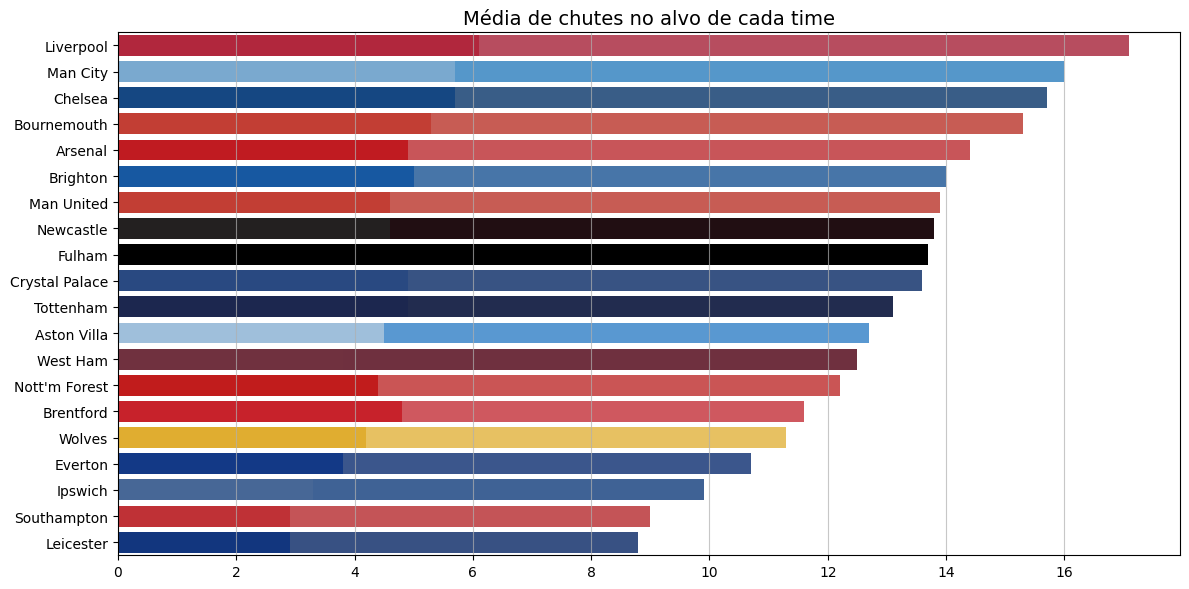

In [ ]:
all_shots = all_shots.sort_values(by='Avg_Total_Shots', ascending=False).reset_index(drop=True)

media = round(all_shots['Avg_Total_SOT'].mean(), 1);

plt.figure(figsize=(12, 6))

ax1 = sns.barplot(
    data=all_shots,
    x='Avg_Total_Shots',
    y='Team',
    hue='Team',
    palette=LIGHT_TEAM_PALETTE,
    orient='h',
    legend=False
)

ax2 = sns.barplot(
    data=all_shots,
    x='Avg_Total_SOT',
    y='Team',
    hue='Team',
    palette=TEAM_COLOR_PALETTE,
    orient='h',
    legend=False
)

plt.grid(axis='x', linestyle='-', alpha=0.7)

# for container in ax2.containers:
    # ax2.bar_label(container, fmt='%.1f', padding=3, fontsize=10)

plt.title('Média de chutes no alvo de cada time', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/graficos_estatistica/media_chutes_no_alvo_empilhado.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# **Relação Mandante x Visitante**

In [ ]:
# Total de vitórias dos mandantes
home_victories = df[df['FTR'] == 'H'].copy()
home_victories_count = home_victories.groupby('HomeTeam').size().reset_index(name='Victories')
home_victories_count.index = range(1, len(home_victories_count) + 1)
total_home_victories = home_victories_count['Victories'].sum()

# Total de vitórias dos visitantes
away_victories = df[df['FTR'] == 'A'].copy()
away_victories_count = away_victories.groupby('AwayTeam').size().reset_index(name='Victories')
away_victories_count.index = range(1, len(away_victories_count) + 1)
total_away_victories = away_victories_count['Victories'].sum()

# Total de empates
total_draws = df['FTR'].value_counts()['D']

# Aproveitamento
total_matches = len(df)
home_points = (total_home_victories * 3) + total_draws
away_points = (total_away_victories * 3) + total_draws

home_percent = (home_points / (total_matches*3)) * 100
away_percent = (away_points / (total_matches*3)) * 100

# Dataframe relação mandante x visitante
victories_table = pd.DataFrame({
    'Tipo': ['Mandante', 'Visitante'],
    'Total de jogos': [total_matches, total_matches],
    'Vitórias': [total_home_victories, total_away_victories],
    'Empates': [total_draws, total_draws],
    'Derrotas': [total_away_victories, total_home_victories]
})

victories_table['Pontos'] = home_points, away_points
victories_table['Aproveitamento em %'] = round(home_percent,2), round(away_percent,2)
victories_table

,Tipo,Total de jogos,Vitórias,Empates,Derrotas,Pontos,Aproveitamento em %
0,Mandante,380,155,93,132,558,48.95
1,Visitante,380,132,93,155,489,42.89


## Plota gráfico média de aproveitamento mandante e visitante

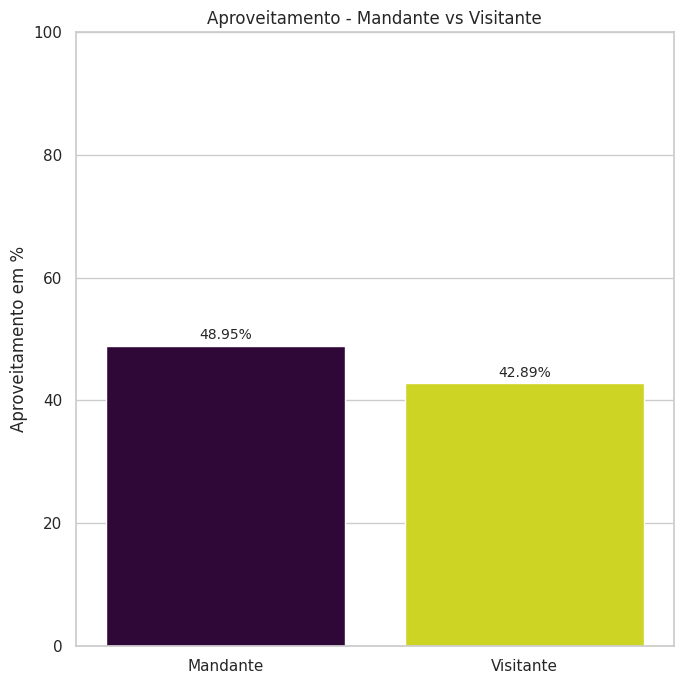

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(7, 7))
sns.barplot(
    data=victories_table,
    x='Tipo',
    y='Aproveitamento em %',
    hue='Tipo',
    palette={
        'Mandante':PL_COLOR_PALETTE['Purple'],
        'Visitante':PL_COLOR_PALETTE['Yellow']
    },
    legend=False
    )

plt.title('Aproveitamento - Mandante vs Visitante')
plt.ylabel('Aproveitamento em %')
plt.xlabel('')

for index, row in victories_table.iterrows():
    plt.text(x=index, y=row['Aproveitamento em %'] + 0.5,
             s=f"{row['Aproveitamento em %']}%",
             ha='center', va='bottom', fontsize=10)

plt.ylim(0, 100)
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/graficos_estatistica/aproveitamento_mandante_visitante.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# **Gols**

In [ ]:
# Quantidade de gols marcados
home_goals_scored = df.groupby('HomeTeam')['FTHG'].sum().reset_index()
away_goals_scored = df.groupby('AwayTeam')['FTAG'].sum().reset_index()
home_goals_scored.columns = ['Team', 'HomeGoalsScored']
away_goals_scored.columns = ['Team', 'AwayGoalsScored']
goals_scored = pd.merge(home_goals_scored, away_goals_scored)
goals_scored['GoalsScored'] = goals_scored['HomeGoalsScored'] + goals_scored['AwayGoalsScored']

# Quantidade de gols sofridos
home_goals_conceded = df.groupby('HomeTeam')['FTAG'].sum().reset_index()
away_goals_conceded = df.groupby('AwayTeam')['FTHG'].sum().reset_index()
home_goals_conceded.columns = ['Team', 'HomeGoalsConceded']
away_goals_conceded.columns = ['Team', 'AwayGoalsConceded']
goals_conceded = pd.merge(home_goals_conceded, away_goals_conceded)
goals_conceded['GoalsConceded'] = goals_conceded['HomeGoalsConceded'] + goals_conceded['AwayGoalsConceded']

# Saldo de gols
goals_stats = pd.merge(goals_scored, goals_conceded)
goals_stats['GoalDifference'] = goals_stats['GoalsScored'] - goals_stats['GoalsConceded']
goals_stats = goals_stats.sort_values(by='GoalDifference', ascending=False).reset_index(drop=True)
goals_stats.index = range(1, len(goals_stats) + 1)

# goals_stats

## Plota gráfico saldo de gols




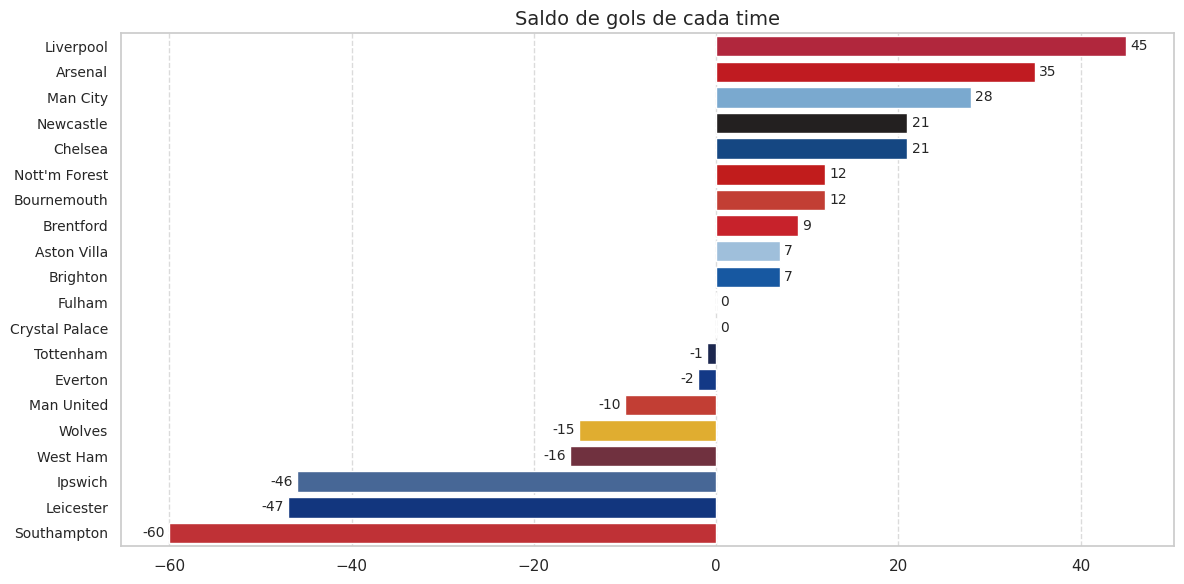

In [ ]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x='GoalDifference',
    y='Team',
    data=goals_stats,
    hue='Team',
    palette=TEAM_COLOR_PALETTE,
    orient='h',
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('Saldo de gols de cada time', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/graficos_estatistica/saldo_de_gols.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# **Conversão de chutes**

In [ ]:
goals_and_shots_stats = pd.merge(top_sot, goals_stats)
goals_and_shots_stats['%Goals'] = round(goals_and_shots_stats['GoalsScored'] / goals_and_shots_stats['Total_SOT'] * 100, 1)

goals_and_shots_stats['ShotsPerGoal'] = round(goals_and_shots_stats['Total_SOT'] / goals_and_shots_stats['GoalsScored'], 1)
goals_and_shots_stats.index = range(1, len(goals_and_shots_stats) + 1)

# goals_and_shots_stats

## Plota gráfico % conversão de chutes

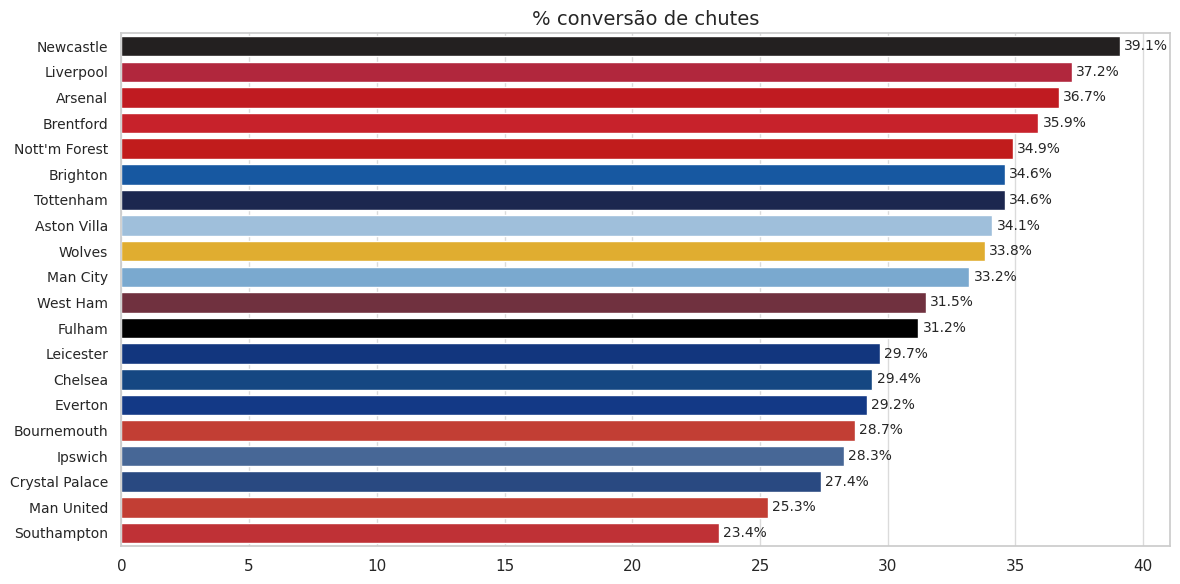

In [ ]:
goals_and_shots_stats = goals_and_shots_stats.sort_values(by='%Goals', ascending=False).reset_index(drop=True)
goals_and_shots_stats.index = range(1, len(goals_and_shots_stats) + 1)

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x='%Goals',
    y='Team',
    hue='Team',
    data=goals_and_shots_stats,
    palette=TEAM_COLOR_PALETTE,
    orient='h',
    legend=False
)


plt.grid(axis='x', linestyle='-', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=10)

color = '#E0D83F'
# plt.axvline(x=media, color=color, linestyle='--', linewidth=0.7, label='Média')
plt.title('% conversão de chutes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/graficos_estatistica/conversao_chutes.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

## Plota gráfico chutes para marcar gol



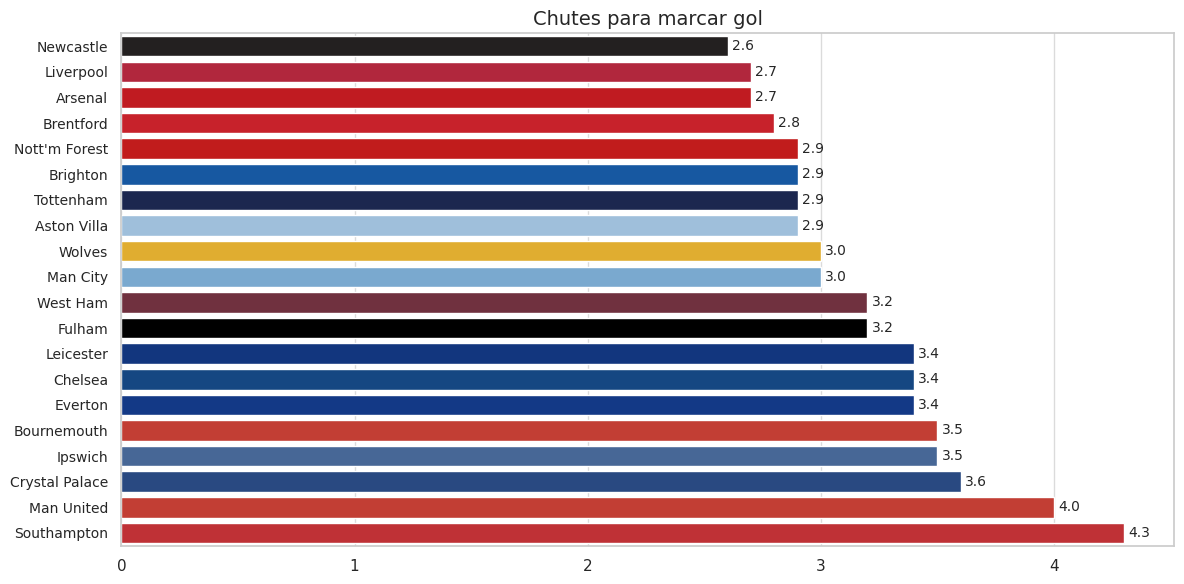

In [ ]:
goals_and_shots_stats = goals_and_shots_stats.sort_values(by='ShotsPerGoal').reset_index(drop=True)
goals_and_shots_stats.index = range(1, len(goals_and_shots_stats) + 1)

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x='ShotsPerGoal',
    y='Team',
    hue='Team',
    data=goals_and_shots_stats,
    palette=TEAM_COLOR_PALETTE,
    orient='h',
    legend=False
)

plt.grid(axis='x', linestyle='-', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3, fontsize=10)

plt.title('Chutes para marcar gol', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/graficos_estatistica/chutes_para_marcar_gol.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# **Resultados de cada time**

In [ ]:
# Quantidade de vitórias
home_victories_count.columns = ['Team', 'HomeVictories']
away_victories_count.columns = ['Team', 'AwayVictories']
all_victories = pd.merge(home_victories_count, away_victories_count, on='Team')
all_victories['TotalVictories'] = all_victories['HomeVictories'] + all_victories['AwayVictories']

# Quantidade de empates
draws = df[df['FTR'] == 'D'].copy()
home_draws  = draws.groupby('HomeTeam').size().reset_index(name='HomeDraws')
away_draws  = draws.groupby('AwayTeam').size().reset_index(name='AwayDraws')
home_draws.columns = ['Team', 'HomeDraws']
away_draws.columns = ['Team', 'AwayDraws']
all_draws = pd.merge(home_draws, away_draws, on='Team')
all_draws['TotalDraws'] = all_draws['HomeDraws'] + all_draws['AwayDraws']

all_stats = pd.merge(all_victories, all_draws, on='Team')

# Quantidade de jogos
home_games_count = df.groupby('HomeTeam').size().reset_index(name='Games')
away_games_count = df.groupby('AwayTeam').size().reset_index(name='Games')
home_games_count.columns = ['Team', 'HomeGames']
away_games_count.columns = ['Team', 'AwayGames']
all_games = pd.merge(home_games_count, away_games_count, on='Team')
all_games['TotalGames'] = all_games['HomeGames'] + all_games['AwayGames']

all_stats = pd.merge(all_games, all_stats, on='Team')

# Quantidade de derrotas
home_loses_count = df[df['FTR'] == 'A'].copy()
away_loses_count = df[df['FTR'] == 'H'].copy()

home_loses_count = home_loses_count.groupby('HomeTeam').size().reset_index(name='HomeLoses')
away_loses_count = away_loses_count.groupby('AwayTeam').size().reset_index(name='AwayLoses')
home_loses_count.columns = ['Team', 'HomeLoses']
away_loses_count.columns = ['Team', 'AwayLoses']
all_loses = pd.merge(home_loses_count, away_loses_count, on='Team')
all_loses['TotalLoses'] = all_loses['HomeLoses'] + all_loses['AwayLoses']

# Data frame vitórias, empates e derrotas
all_stats = pd.merge(all_stats, all_loses, on='Team')
all_stats.index = range(1, len(all_stats) + 1)

# Definindo o grupo do time
big_six = ['Arsenal', 'Man City', 'Man United', 'Liverpool', 'Chelsea', 'Tottenham']
all_stats['Grupo'] = all_stats['Team'].apply(lambda x: 'Big Six' if x in big_six else 'Outros')


# all_stats

# **Pontos**

In [ ]:
all_stats['HomePoints'] = all_stats['HomeVictories'] * 3 + all_stats['HomeDraws']
all_stats['AwayPoints'] = all_stats['AwayVictories'] * 3 + all_stats['AwayDraws']
all_stats['TotalPoints'] = all_stats['HomePoints'] + all_stats['AwayPoints']

# all_stats = all_stats.sort_values(by='TotalPoints', ascending=False).reset_index(drop=True)
# all_stats.index = range(1, len(all_stats) + 1)

# all_stats

## Plota bloxplot pontos big six x outros

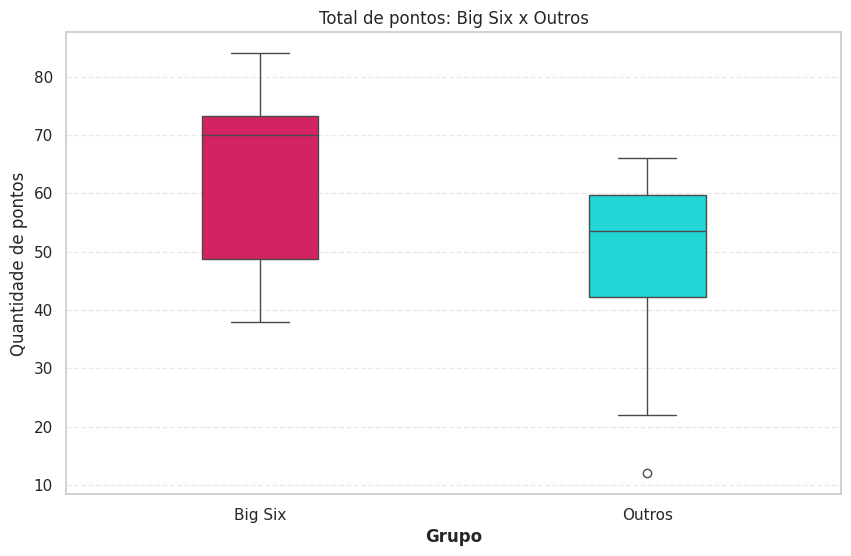

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=all_stats,
    x='Grupo',
    y='TotalPoints',
    hue='Grupo',
    palette={
        'Big Six':PL_COLOR_PALETTE['Red'],
        'Outros':PL_COLOR_PALETTE['Blue']
    },
    width=0.3,
)

plt.title('Total de pontos: Big Six x Outros')
plt.ylabel('Quantidade de pontos')
plt.xlabel('Grupo', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.savefig('/content/drive/MyDrive/graficos_estatistica/pontos_bigsix_outros.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()


## Plota boxplot pontos como mandante e visitante

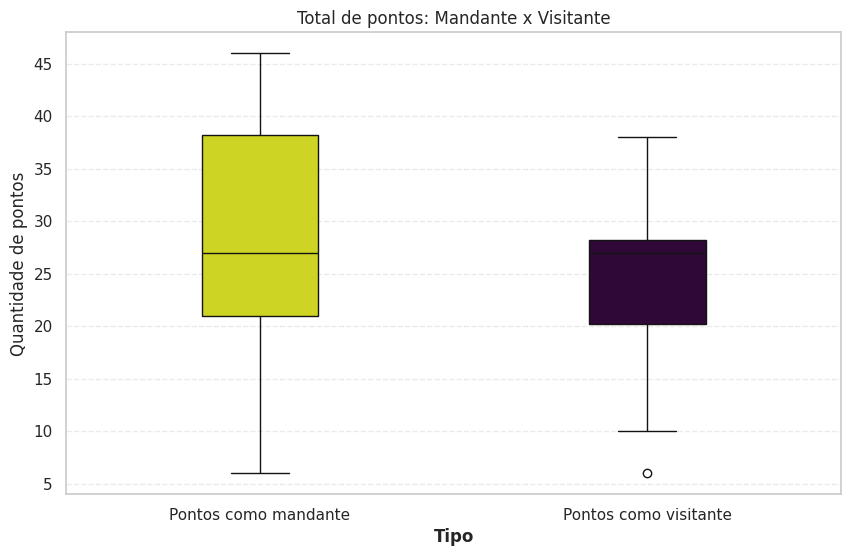

In [ ]:
pontos_mandante_visitante = pd.melt(
    all_stats,
    id_vars=['Team'],
    value_vars=['HomePoints', 'AwayPoints'],
    var_name='Tipo',
    value_name='Pontos'
)

pontos_mandante_visitante['Tipo'] = pontos_mandante_visitante['Tipo'].replace({
    'HomePoints': 'Pontos como mandante',
    'AwayPoints': 'Pontos como visitante'
})

plt.figure(figsize=(10,6))

sns.boxplot(
    data=pontos_mandante_visitante,
    x='Tipo',
    y='Pontos',
    hue='Tipo',
    palette={
        'Pontos como mandante':PL_COLOR_PALETTE["Yellow"],
        'Pontos como visitante':PL_COLOR_PALETTE['Purple']
    },
    width=0.3
)

plt.title('Total de pontos: Mandante x Visitante')
plt.ylabel('Quantidade de pontos')
plt.xlabel('Tipo', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.savefig('/content/drive/MyDrive/graficos_estatistica/pontos_mandante_visitante.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()
# pontos_mandante_visitante


# **Aproveitamento**

In [ ]:
# Aproveitamento mandante e visitante
all_stats['Home%'] = ((all_stats['HomeVictories'] * 3 + all_stats['HomeDraws']) / (all_stats['HomeGames'] * 3) * 100)
all_stats['Away%'] = ((all_stats['AwayVictories'] * 3 + all_stats['AwayDraws']) / (all_stats['AwayGames'] * 3) * 100)
all_stats['Home%'] = round(all_stats['Home%'], 1)
all_stats['Away%'] = round(all_stats['Away%'], 1)

# Aproveitamento todos os times
all_stats['Total%'] = ((all_stats['TotalVictories'] * 3 + all_stats['TotalDraws']) / (all_stats['TotalGames'] * 3) * 100)
all_stats['Total%'] = round(all_stats['Total%'], 1)

# all_stats

In [ ]:
tabela = pd.merge(all_stats, goals_stats)
tabela = all_stats.sort_values(by=['TotalPoints', 'GoalDifference'], ascending=[False, False].reset_index(drop=True)
tabela.index = range(1, len(tabela) + 1)

tabela

KeyError: 'GoalDifference'

# **Escudos dos times**

In [ ]:
from re import A
# Passo 1: Buscar times da Premier League
url = "https://www.thesportsdb.com/api/v1/json/3/search_all_teams.php?l=English%20Premier%20League"
response = requests.get(url)
all_teams = response.json()['teams']

# Passo 2: Criar DataFrame
url_teams = pd.DataFrame([{
    'Team': team['strTeam'],
    'Badge': team['strBadge'],
} for team in all_teams])

url_teams.index = range(1, len(url_teams) + 1)
url_teams['Team'] = all_stats['Team']

all_stats = pd.merge(url_teams, all_stats, on='Team')
all_stats.index = range(1, len(all_stats) + 1)


# print(url_teams.loc[1, 'Team'])
# print(url_teams.loc[1, 'Badge'])

# print(all_stats.loc[1, 'Team'])
# print(all_stats.loc[1, 'Badge'])

## Plota plano cartesiano relação Chutes a gol x Gols

Arsenal
https://r2.thesportsdb.com/images/media/team/badge/uyhbfe1612467038.png
Arsenal
https://r2.thesportsdb.com/images/media/team/badge/uyhbfe1612467038.png


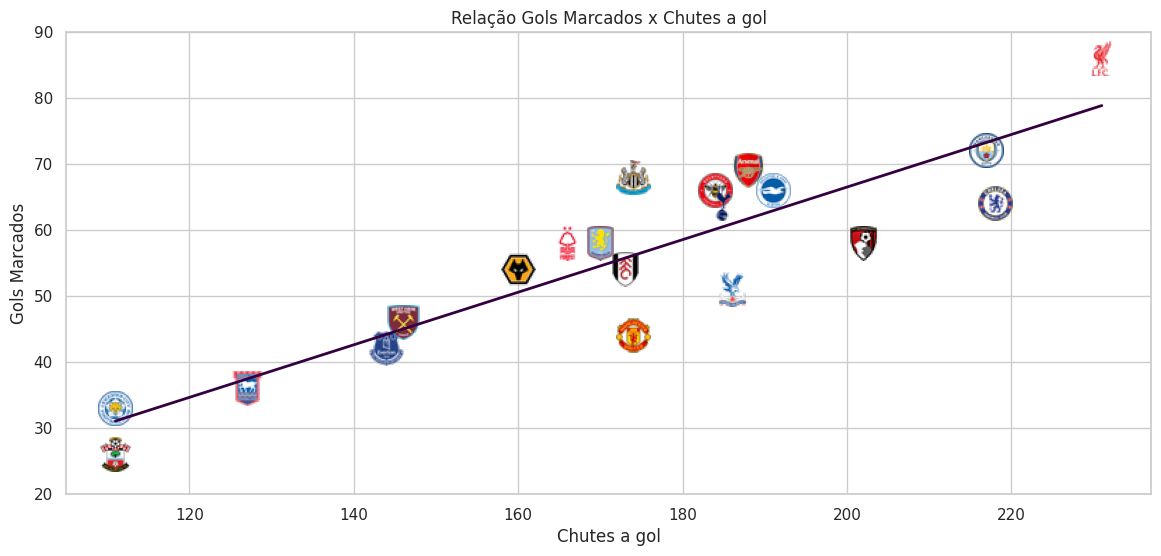

In [ ]:
goals_and_shots_stats_badges = pd.merge(url_teams, goals_and_shots_stats, on='Team')
goals_and_shots_stats_badges.index = range(1, len(goals_and_shots_stats_badges) + 1)
# print(goals_and_shots_stats)

print(goals_and_shots_stats_badges.loc[1, 'Team'])
print(goals_and_shots_stats_badges.loc[1, 'Badge'])

print(all_stats.loc[1, 'Team'])
print(all_stats.loc[1, 'Badge'])

plt.figure(figsize=(14, 6))

# sns.scatterplot(
#     data=goals_and_shots_stats_badges,
#     x='GoalsScored',
#     y='Total_Shots',
#     hue='Team',
#     s=100,
#     legend=False
# )

# y_min, y_max = plt.ylim()
# x_min, x_max = plt.xlim()
# plt.axvline((x_max + x_min)/2, color='gray', linestyle='-', linewidth=1)
# plt.axhline((y_max + y_min)/2, color='gray', linestyle='-', linewidth=1)

# Plotando os escudos primeiro para que a linha fique sobreposta
for index, row in goals_and_shots_stats_badges.iterrows():
    try:

        response = requests.get(row['Badge'])
        img = Image.open(BytesIO(response.content))

        # Redimensionar a logo (ajuste o zoom conforme necessário)
        img_resized = img.resize((BADGE_SIZE-10, BADGE_SIZE-10), Image.LANCZOS)

        # Criar uma AnnotationBbox para posicionar a logo
        ab = AnnotationBbox(
            OffsetImage(img_resized, zoom=1),
            (row['Total_SOT'], row['GoalsScored']),
            frameon=False,
        )
        plt.gca().add_artist(ab)

    except Exception as e:
        print(f"Erro ao carregar logo do time {row['Team']}: {e}")
        plt.text(
            x=row['Total_SOT'],
            y=row['GoalsScored'],
            s=row['Team'],
            fontsize=6,
            ha='center',
            va='bottom'
        )


color = PL_COLOR_PALETTE['Purple']
sns.regplot(
    data=goals_and_shots_stats_badges,
    x='Total_SOT',
    y='GoalsScored',
    scatter=False,
    ci=None,
    line_kws={'color':color, 'linestyle':'-', 'alpha':1, 'linewidth':2, 'label':'Tendência', 'zorder':3}
)

# plt.xlim(0, goals_and_shots_stats_badges['GoalsScored'].max()*1.1)
plt.ylim(20, 90)


# # Obtenha os limites que seriam usados automaticamente
# x_min, x_max = plt.gca().get_xlim()  # Eixo X
# y_min, y_max = plt.gca().get_ylim()  # Eixo Y

# print(f"Limites do eixo X: ({x_min}, {x_max})")
# print(f"Limites do eixo Y: ({y_min}, {y_max})")

plt.xlabel('Chutes a gol')
plt.ylabel('Gols Marcados')
plt.title('Relação Gols Marcados x Chutes a gol')
plt.savefig('/content/drive/MyDrive/graficos_estatistica/relacao_gols_chutes_a_gol.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

## Plota gráfico aproveitamento como mandante

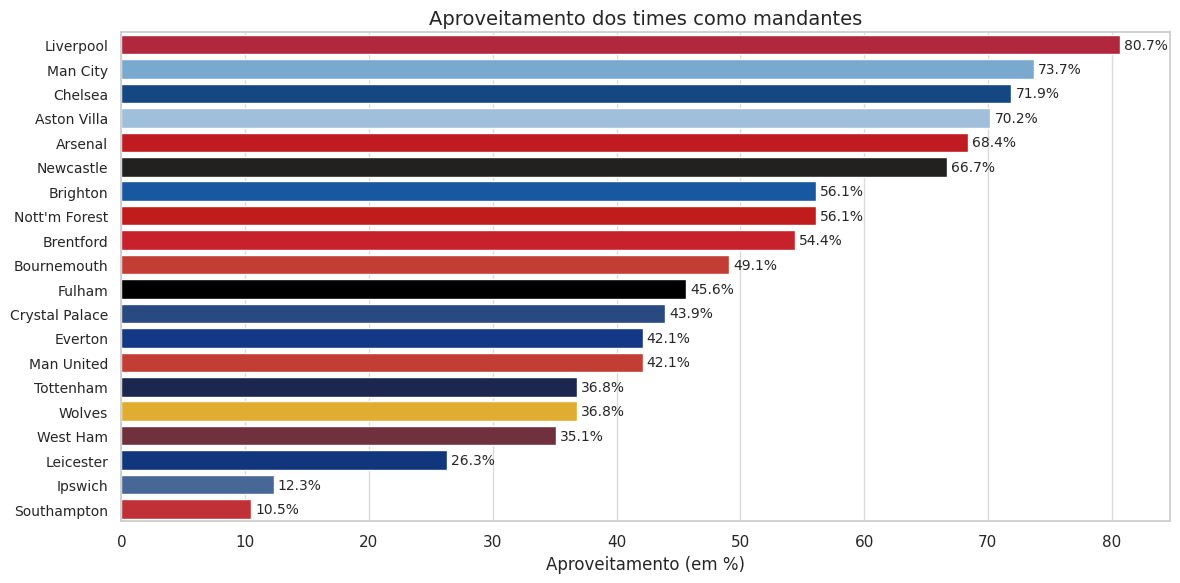

In [ ]:
all_stats.sort_values(by='Home%', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Home%',
    y='Team',
    hue='Team',
    data=all_stats,
    palette=TEAM_COLOR_PALETTE,
    orient='h',
    legend=False
)

plt.grid(axis='x', linestyle='-', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=10)

plt.title('Aproveitamento dos times como mandantes', fontsize=14)
plt.xlabel('Aproveitamento (em %)')
plt.ylabel('')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/graficos_estatistica/aproveitamento_mandante.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

## Plota gráfico aproveitamento como visitante


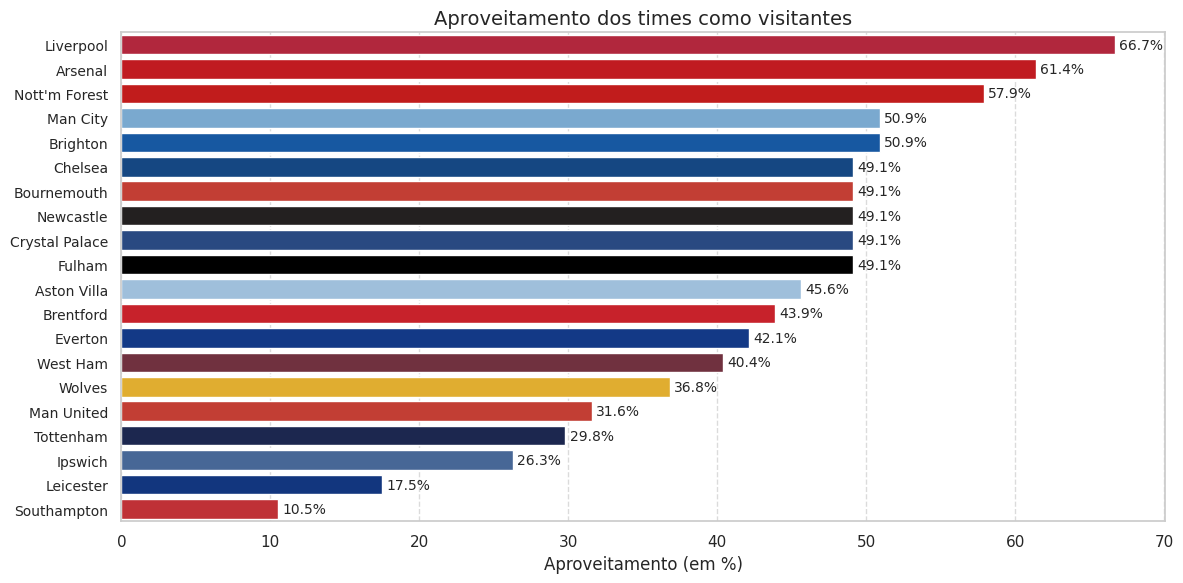

In [ ]:
all_stats.sort_values(by='Away%', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Away%',
    y='Team',
    hue='Team',
    data=all_stats,
    palette=TEAM_COLOR_PALETTE,
    orient='h',
    legend=False,
    dodge=False
)

# Colocando corzinha diferente
# for i, bar in enumerate(ax.patches):
#     team_name = all_stats['Team'].iloc[i]
#     if team_name == 'Crystal Palace':
#         bar.set_color('red')
#         bar.set_alpha(0.8)
#     if team_name == 'Liverpool':
#         bar.set_color('green')
#         bar.set_alpha(0.8)


plt.grid(axis='x', linestyle='--', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=10)

plt.title('Aproveitamento dos times como visitantes', fontsize=14)
plt.xlabel('Aproveitamento (em %)')
plt.ylabel('')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/graficos_estatistica/aproveitamento_visitante.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# **Vs Big Six**

In [ ]:
big_six = ['Arsenal', 'Man City', 'Man United', 'Liverpool', 'Chelsea', 'Tottenham']

# Quantidade de jogos
home_games_vs_big_six = df[df['AwayTeam'].isin(big_six)].copy()
away_games_vs_big_six = df[df['HomeTeam'].isin(big_six)].copy()
all_games_vs_big_six = pd.concat([home_games_vs_big_six, away_games_vs_big_six])

# Quantidade de pontos como mandante e visitante
home_games_vs_big_six.loc[home_games_vs_big_six['FTR'] == 'H', 'points'] = 3
away_games_vs_big_six.loc[away_games_vs_big_six['FTR'] == 'A', 'points'] = 3
home_games_vs_big_six.loc[home_games_vs_big_six['FTR'] == 'D', 'points'] = 1
away_games_vs_big_six.loc[away_games_vs_big_six['FTR'] == 'D', 'points'] = 1
home_points_vs_big_six = home_games_vs_big_six.groupby('HomeTeam')['points'].sum().reset_index()
away_points_vs_big_six = away_games_vs_big_six.groupby('AwayTeam')['points'].sum().reset_index()
home_points_vs_big_six.columns = ['Team', 'HomePointsVsBigSix']
away_points_vs_big_six.columns = ['Team', 'AwayPointsVsBigSix']

# Total de pontos
points_vs_big_six = pd.merge(home_points_vs_big_six, away_points_vs_big_six, on='Team')
points_vs_big_six['TotalPointsVsBigSix'] = points_vs_big_six['HomePointsVsBigSix'] + points_vs_big_six['AwayPointsVsBigSix']
points_vs_big_six = points_vs_big_six.astype({
    'HomePointsVsBigSix': int,
    'AwayPointsVsBigSix': int,
    'TotalPointsVsBigSix': int
})

# Quantidade de jogos como mandante e visitante
home_games_vs_big_six_count = home_games_vs_big_six.groupby('HomeTeam').size().reset_index()
away_games_vs_big_six_count = away_games_vs_big_six.groupby('AwayTeam').size().reset_index()
home_games_vs_big_six_count.columns = ['Team', 'HomeGamesVsBigSix']
away_games_vs_big_six_count.columns = ['Team', 'AwayGamesVsBigSix']

# Total de jogos
all_games_vs_big_six = pd.merge(home_games_vs_big_six_count, away_games_vs_big_six_count, on='Team')
all_games_vs_big_six['TotalGamesVsBigSix'] = all_games_vs_big_six['HomeGamesVsBigSix'] + all_games_vs_big_six['AwayGamesVsBigSix']
all_stats_vs_big_six = pd.merge(points_vs_big_six, all_games_vs_big_six, on='Team', how='left')

# Aproveitamento
all_stats_vs_big_six['AproveitamentoVsBigSix%'] = (all_stats_vs_big_six['TotalPointsVsBigSix'] / (all_stats_vs_big_six['TotalGamesVsBigSix'] * 3)) * 100
all_stats_vs_big_six['AproveitamentoVsBigSix%'] = all_stats_vs_big_six['AproveitamentoVsBigSix%'].round(1)
all_stats_vs_big_six = all_stats_vs_big_six.sort_values('AproveitamentoVsBigSix%', ascending=False)
all_stats_vs_big_six.index = range(1, len(all_stats_vs_big_six) + 1)
all_stats_vs_big_six = all_stats_vs_big_six[['Team','HomeGamesVsBigSix', 'AwayGamesVsBigSix', 'TotalGamesVsBigSix',
                                          'HomePointsVsBigSix', 'AwayPointsVsBigSix', 'TotalPointsVsBigSix',
                                           'AproveitamentoVsBigSix%']]

# all_stats_vs_big_six

## Plota gráfico aproveitamento vs Big Six

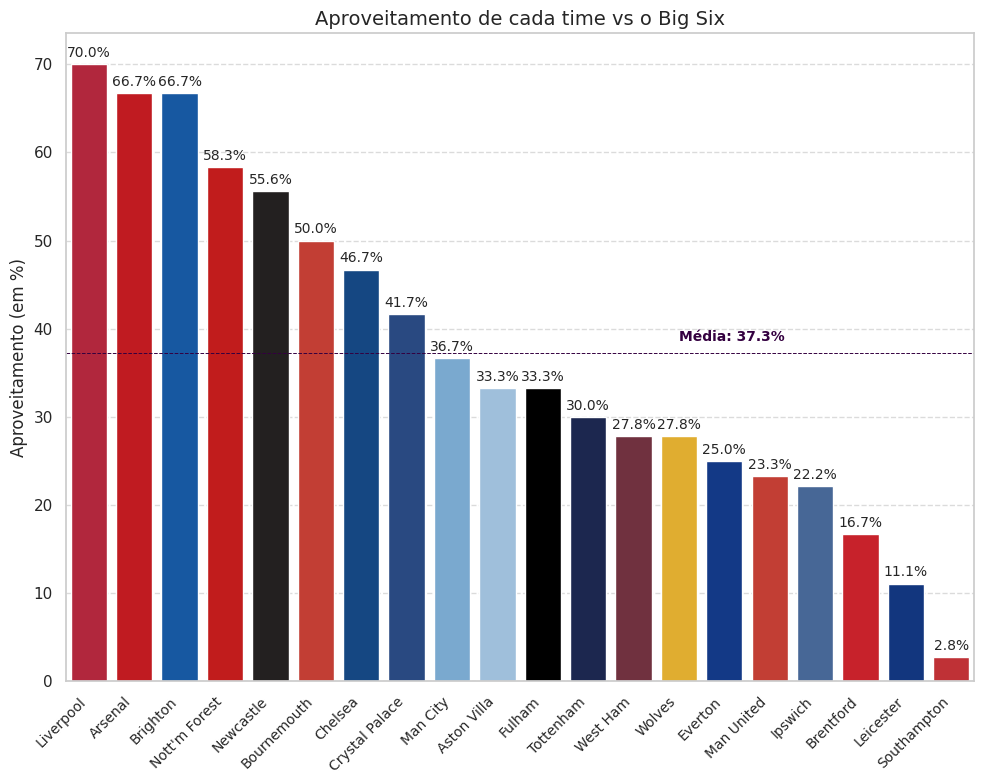

In [ ]:
plt.figure(figsize=(10, 8))

ax = sns.barplot(
    x='Team',
    y='AproveitamentoVsBigSix%',
    hue='Team',
    data=all_stats_vs_big_six,
    palette=TEAM_COLOR_PALETTE,
    orient='v',
    legend=False
)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=10)

media = round(all_stats_vs_big_six['AproveitamentoVsBigSix%'].mean(), 1)
color = PL_COLOR_PALETTE['Purple']
plt.axhline(y=media, color=color, linestyle='--', linewidth=0.7, label='Média')
plt.text(13, media + 1, f'Média: {media}%', color=color, ha='left', va='bottom', fontsize=10, fontweight='bold')

plt.title('Aproveitamento de cada time vs o Big Six', fontsize=14)
plt.xlabel('')
plt.ylabel('Aproveitamento (em %)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/graficos_estatistica/aproveitamento_vs_bigsix.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# **Valores de mercado**

In [ ]:
# URL da página de valores de mercado da Premier League no Transfermarkt
url = "https://www.transfermarkt.com/premier-league/marktwerteverein/wettbewerb/GB1"

# Headers para simular um navegador (evitar bloqueio)
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Faz a requisição HTTP
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Listas para armazenar os dados
times = []
valores = []

# Extrai os nomes dos times
c = 0
for row in soup.select('table.items tbody tr'):
    nome_time = row.select_one('td.hauptlink a').text.strip()
    valor_element = row.select_one('td.rechts.hauptlink a[title]')
    valor_mercado = valor_element.text.strip() if valor_element else "N/A"
    times.append(nome_time)
    valores.append(valor_mercado)
    c += 1
    if c == 20:
      break

# Cria o DataFrame
team_values = pd.DataFrame({
    'Team': times,
    'MarketValue': valores
})

def convert_market_value(value_str):
    value_str = value_str.replace('€', '')
    if 'bn' in value_str:
        return float(value_str.replace('bn', '')) * 1e9
    elif 'm' in value_str:
        return float(value_str.replace('m', '')) * 1e6
    else:
        return float(value_str)

def convert_market_billion(value_str):
    value_str = value_str.replace('€', '')
    if 'bn' in value_str:
        value = float(value_str.replace('bn', '')) * 1e3
        return '€' + str(round(value, 1)) + 'm'
    elif 'm' in value_str:
        return '€' + value_str
    else:
        return '€' + value_str

name_mapping = {
    'Arsenal FC': 'Arsenal',
    'Liverpool FC': 'Liverpool',
    'Chelsea FC': 'Chelsea',
    'Tottenham Hotspur': 'Tottenham',
    'Manchester United': 'Man United',
    'Newcastle United': 'Newcastle',
    'Aston Villa': 'Aston Villa',
    'Brighton & Hove Albion': 'Brighton',
    'West Ham United': 'West Ham',
    'Nottingham Forest': 'Nott\'m Forest',
    'Crystal Palace': 'Crystal Palace',
    'AFC Bournemouth': 'Bournemouth',
    'Brentford FC': 'Brentford',
    'Wolverhampton Wanderers': 'Wolves',
    'Everton FC': 'Everton',
    'Fulham FC': 'Fulham',
    'Ipswich Town': 'Ipswich',
    'Southampton FC': 'Southampton',
    'Leicester City': 'Leicester',
    'Manchester City': 'Man City'
}

team_values['Team'] = team_values['Team'].map(name_mapping)

team_values['NumericValue'] = team_values['MarketValue'].apply(convert_market_value)
team_values['MarketValue'] = team_values['MarketValue'].apply(convert_market_billion)

team_values.index = range(1, len(team_values) + 1)

# team_values
all_stats = pd.merge(all_stats, team_values, on='Team', how='left')
all_stats.index = range(1, len(all_stats) + 1)

# all_stats

# Plot boxplot valores de mercado

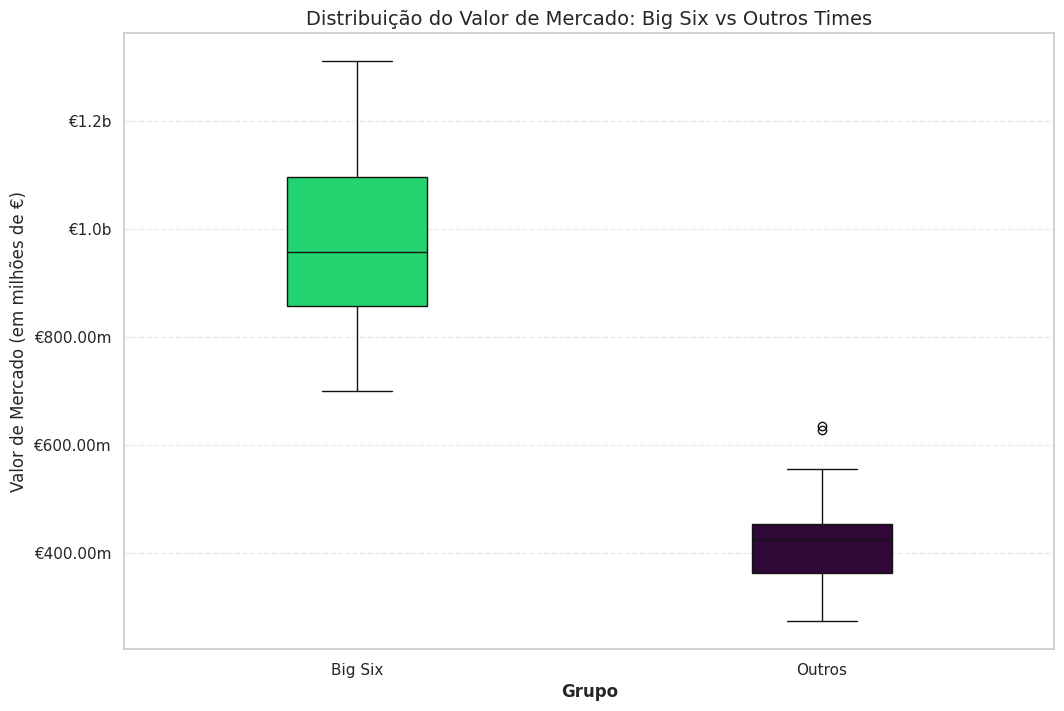

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=all_stats,
    x='Grupo',
    y='NumericValue',
    hue='Grupo',
    palette={
        'Big Six': PL_COLOR_PALETTE['Green'],
        'Outros': PL_COLOR_PALETTE['Purple']
    },
    width=0.3
)

def format_y_axis(value, _):
    # print(value)
    # original_value = 10 ** value if plt.gca().get_yscale() == 'log' else value

    if value >= 1e9:
        return f'€{value/1e9:.1f}b'  # Bilhões
    elif value >= 1e6:
        return f'€{value/1e6:.2f}m'  # Milhões
    else:
        return f'€{value:.0f}'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y_axis))

plt.title('Distribuição do Valor de Mercado: Big Six vs Outros Times', fontsize=14)
plt.xlabel('Grupo', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Mercado (em milhões de €)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.savefig('/content/drive/MyDrive/graficos_estatistica/relacao_valor_bigsix_outros.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

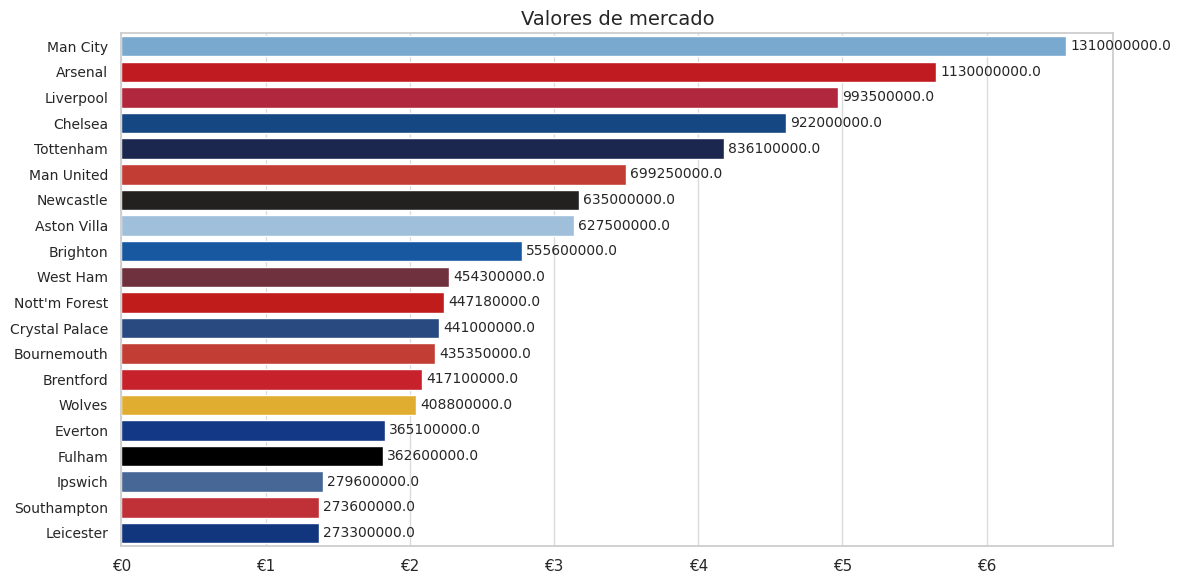

In [ ]:
all_stats_sort_numeric_value = all_stats.sort_values(by='NumericValue', ascending=False)
all_stats_sort_numeric_value.index = range(1, len(all_stats_sort_numeric_value) + 1)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='NumericValue',
    y='Team',
    hue='Team',
    data=all_stats_sort_numeric_value,
    palette=TEAM_COLOR_PALETTE,
    orient='h',
    legend=False
)


plt.grid(axis='x', linestyle='-', alpha=0.7)

def format_x_axis(_, value):
    # print(value)
    # original_value = 10 ** value if plt.gca().get_yscale() == 'log' else value

    if value >= 1e9:
        return f'€{value/1e9:.1f}b'  # Bilhões
    elif value >= 1e6:
        return f'€{value/1e6:.2f}m'  # Milhões
    else:
        return f'€{value:.0f}'

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(format_x_axis))

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3, fontsize=10)

plt.title('Valores de mercado', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=10)
plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/graficos_estatistica/media_faltas.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

## Plota plano cartesiano relação Valor de Mercado x Aproveitamento

x_min: 5.5, x_max: 78.7
y_min: 245970000.0, y_max: 1441000000.0
y_mid: 593344000.0
y_median: 450740000.0
y_mode: 273300000.0
Valores dos ticks: [3.0e+08 4.0e+08 6.0e+08 1.0e+09 1.4e+09]
Labels dos ticks formatados: ['€300.00m', '€400.00m', '€600.00m', '€1000.00m', '€1400.00m']


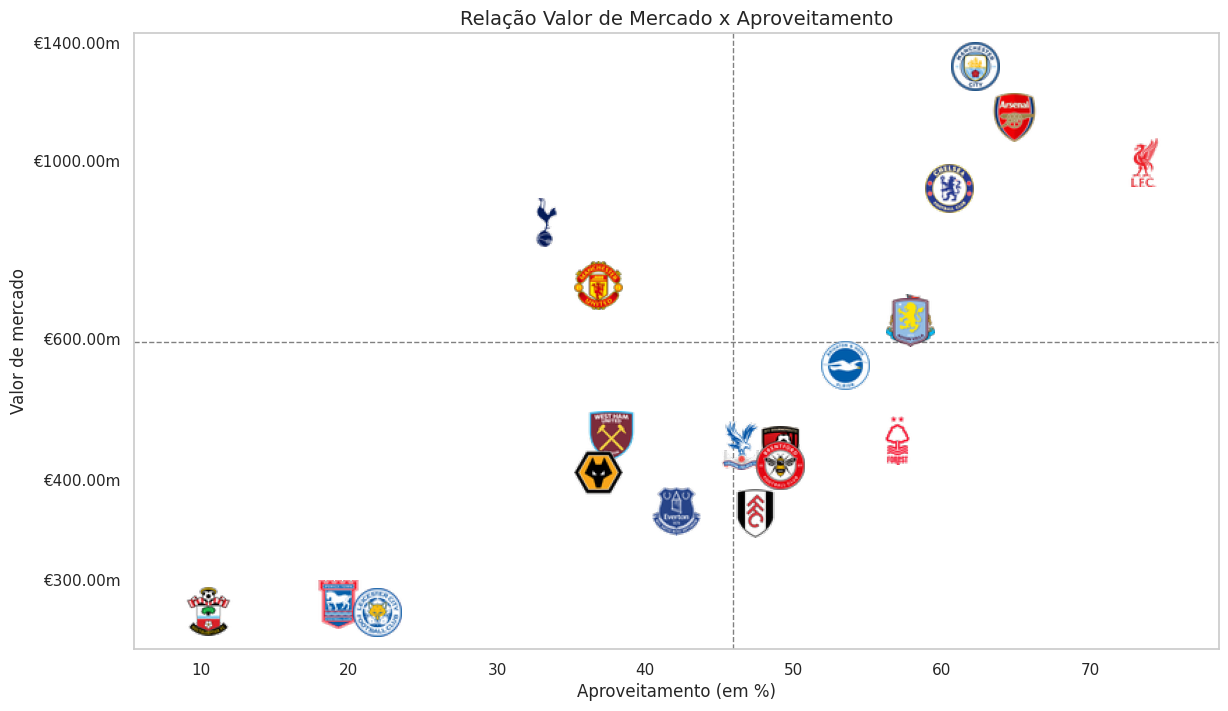

In [ ]:
all_stats_sort = all_stats.sort_values('NumericValue', ascending=False)

plt.figure(figsize=(14,8))

plt.yscale('log')

sns.scatterplot(
    data=all_stats_sort,
    x='Total%',
    y='NumericValue',
    hue='Team',
    s=1,
    legend=False
    )

# x_min, x_max = plt.xlim()
# y_min, y_max = plt.ylim()

x_min, x_max = all_stats_sort['Total%'].min() - 5, all_stats_sort['Total%'].max() + 5
plt.xlim(x_min, x_max)

y_min, y_max = all_stats_sort['NumericValue'].min() * 0.9, all_stats_sort['NumericValue'].max() * 1.1
plt.ylim(y_min, y_max)

print(f'x_min: {x_min}, x_max: {x_max}')
print(f'y_min: {y_min}, y_max: {y_max}')

# x_mid = (x_max + x_min) / 2
# y_mid = (y_max + y_min) / 2
# y_mid = all_stats_sort['NumericValue'].mean() / 1e6
x_mid = all_stats_sort['Total%'].mean()
y_mid = all_stats_sort['NumericValue'].mean()
y_median = all_stats_sort['NumericValue'].median()
y_mode = all_stats_sort['NumericValue'].mode()
y_mode = y_mode.iloc[0] if not y_mode.empty else None
print(f'y_mid: {y_mid}')
print(f'y_median: {y_median}')
print(f'y_mode: {y_mode}')

plt.axvline(x_mid, color='gray', linestyle='--', linewidth=1)
plt.axhline(y_mid, color='gray', linestyle='--', linewidth=1)

for index, row in all_stats_sort.iterrows():
    try:
        response = requests.get(row['Badge'])
        img = Image.open(BytesIO(response.content))

        # Redimensionar a logo (ajuste o zoom conforme necessário)
        img_resized = img.resize((BADGE_SIZE, BADGE_SIZE), Image.LANCZOS)

        # Criar uma AnnotationBbox para posicionar a logo
        ab = AnnotationBbox(
            OffsetImage(img_resized, zoom=1),
            (row['Total%'], row['NumericValue']),
            frameon=False
        )
        plt.gca().add_artist(ab)

    except Exception as e:
        print(f"Erro ao carregar logo do time {row['Team']}: {e}")
        plt.text(
            x=row['Total%'],
            y=row['MarketValue'] + 1,
            s=row['Team'],
            fontsize=6,
            ha='center',
            va='bottom'
        )

# yticks = all_stats_sort['NumericValue'].unique()
# ylabels = all_stats_sort.drop_duplicates('NumericValue')['MarketValue'].values
# tick_values = [2e8, 3e8, 4e8, 5e8, 6e8, 7e8, 8e8, 9e8, 1e9, 1.1e9, 1.2e9, 1.3e9, 1.4e9]

# plt.yticks(tick_values)

# Formata o eixo y para mostrar em milhões/bilhões
def format_y_axis(value, _):
    # print(value)
    # original_value = 10 ** value if plt.gca().get_yscale() == 'log' else value

    # if value >= 1e9:
    #     return f'€{value/1e9:.1f}b'  # Bilhões
    if value >= 1e6:
        return f'€{value/1e6:.2f}m'  # Milhões
    else:
        return f'€{value:.0f}'

# plt.ticklabel_format(style='plain', axis='y')
tick_values = [3e8, 4e8, 6e8, 1e9, 1.4e9]
plt.yticks(tick_values)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y_axis))

# Capturar os valores dos ticks
yticks = plt.gca().get_yticks()

# Capturar os labels formatados
yticklabels = [label.get_text() for label in plt.gca().get_yticklabels()]

# Imprimir os valores e os labels no terminal
print("Valores dos ticks:", yticks)
print("Labels dos ticks formatados:", yticklabels)

plt.title('Relação Valor de Mercado x Aproveitamento', fontsize=14)
plt.xlabel('Aproveitamento (em %)')
plt.ylabel('Valor de mercado')
plt.grid(False)
plt.savefig('/content/drive/MyDrive/graficos_estatistica/relacao_valor_aproveitamento.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# **Média de faltas**

In [ ]:
# Quantidade de faltas mandante e visitante
home_fouls = df.groupby('HomeTeam')['HF'].sum().reset_index()
away_fouls = df.groupby('AwayTeam')['AF'].sum().reset_index()
home_fouls.columns = ['Team', 'HomeFouls']
away_fouls.columns = ['Team', 'AwayFouls']

# Total de faltas
all_fouls = pd.merge(home_fouls, away_fouls, on='Team')
all_fouls['TotalFouls'] = all_fouls['HomeFouls'] + all_fouls['AwayFouls']
all_fouls = all_fouls.sort_values('TotalFouls', ascending=False).reset_index(drop=True)
all_fouls.index = range(1, len(all_fouls) + 1)
all_fouls['AvgFouls'] = all_fouls['TotalFouls'] / all_stats['TotalGames']
all_fouls['AvgFouls'] = round(all_fouls['AvgFouls'], 1)

# all_fouls

## Plota gráfico média de faltas

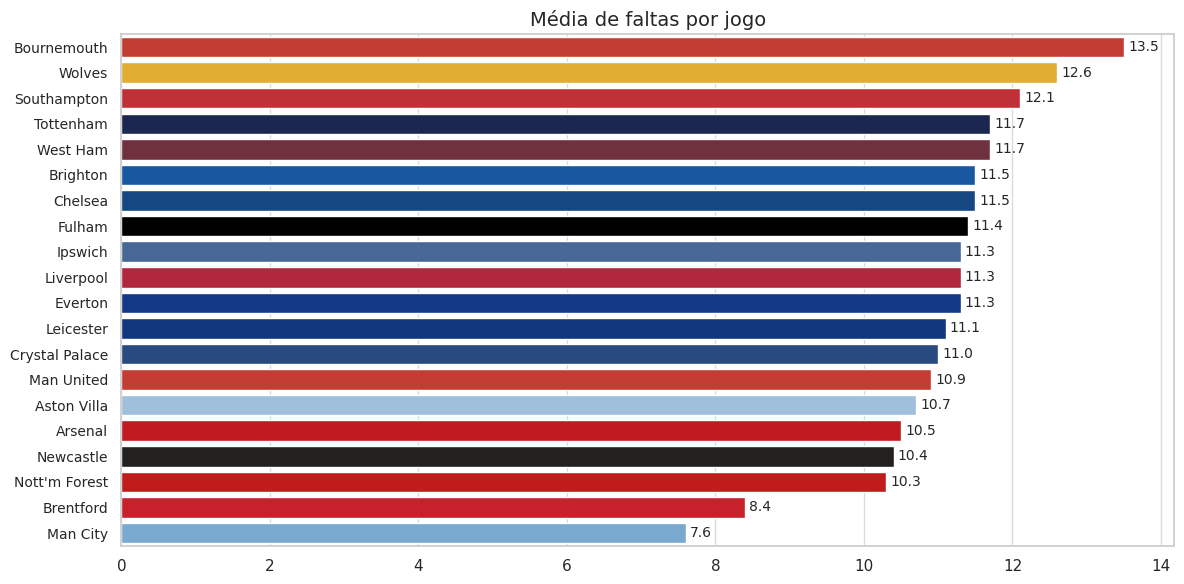

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='AvgFouls',
    y='Team',
    hue='Team',
    data=all_fouls,
    palette=TEAM_COLOR_PALETTE,
    orient='h',
    legend=False
)


plt.grid(axis='x', linestyle='-', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3, fontsize=10)

# color = ''
# plt.axvline(x=media, color=color, linestyle='--', linewidth=0.7, label='Média')
plt.title('Média de faltas por jogo', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/graficos_estatistica/media_faltas.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# **Cartões**

In [ ]:
# Quantidade de cartões amarelos mandante e visitante
yellow_cards_home = df.groupby('HomeTeam')['HY'].sum().reset_index()
yellow_cards_away = df.groupby('AwayTeam')['AY'].sum().reset_index()
yellow_cards_home.columns = ['Team', 'HomeYellowCards']
yellow_cards_away.columns = ['Team', 'AwayYellowCards']

# Total de cartões amarelos
yellow_cards_total = pd.merge(yellow_cards_home, yellow_cards_away, on='Team')
yellow_cards_total['TotalYellowCards'] = yellow_cards_total['HomeYellowCards'] + yellow_cards_total['AwayYellowCards']

# Quantidade de cartões vermelhos mandante e visitante
red_cards_home = df.groupby('HomeTeam')['HR'].sum().reset_index()
red_cards_away = df.groupby('AwayTeam')['AR'].sum().reset_index()
red_cards_home.columns = ['Team', 'HomeRedCards']
red_cards_away.columns = ['Team', 'AwayRedCards']

# Total de cartões vermelhos
red_cards_total = pd.merge(red_cards_home, red_cards_away, on='Team')
red_cards_total['TotalRedCards'] = red_cards_total['HomeRedCards'] + red_cards_total['AwayRedCards']

# Total de cartões
all_cards = pd.merge(yellow_cards_total, red_cards_total, on='Team')
all_cards['TotalCards'] = all_cards['TotalYellowCards'] + all_cards['TotalRedCards']
all_cards = all_cards.sort_values('TotalCards', ascending=False).reset_index(drop=True)
all_cards.index = range(1, len(all_cards) + 1)

# Media de cartões
all_cards['AvgCards'] = all_cards['TotalCards'] / all_stats['TotalGames']
all_cards['AvgCards'] = round(all_cards['AvgCards'], 1)

# all_cards

## Plota gráfico total de cartões

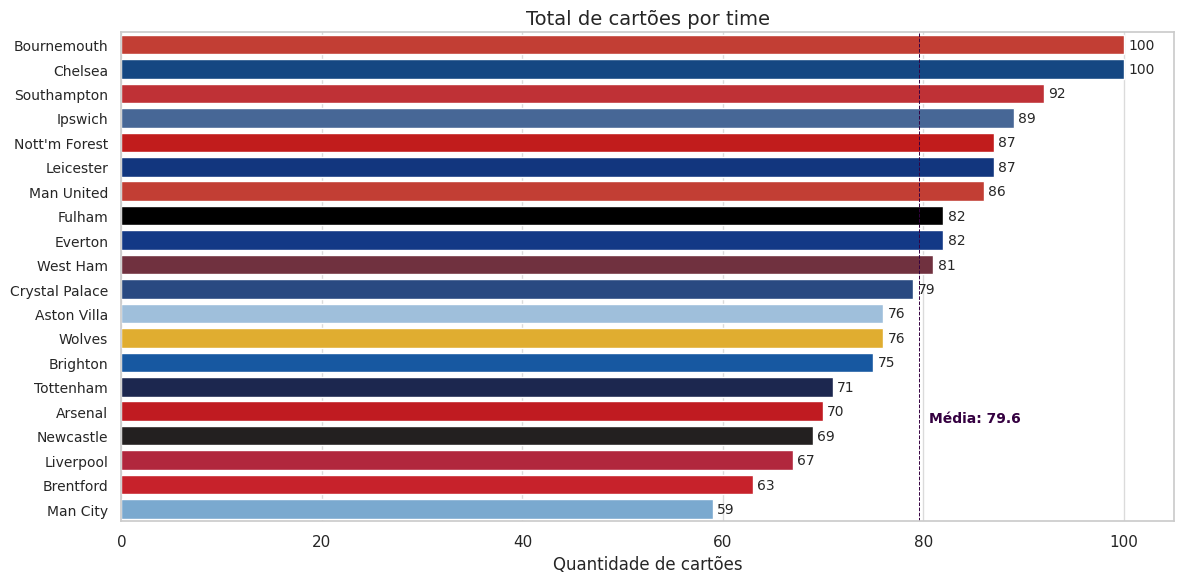

In [ ]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x='TotalCards',
    y='Team',
    hue='Team',
    data=all_cards,
    palette=TEAM_COLOR_PALETTE,
    orient='h',
    legend=False
)


plt.grid(axis='x', linestyle='-', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

media = round(all_cards['TotalCards'].mean(), 1)
color = PL_COLOR_PALETTE['Purple']
plt.text(media + 1, 15, f'Média: {media}', color=color, ha='left', va='top', fontsize=10, fontweight='bold')
plt.axvline(x=media, color=color, linestyle='--', linewidth=0.7, label='Média')

plt.title('Total de cartões por time', fontsize=14)
plt.xlabel('Quantidade de cartões')
plt.ylabel('')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/graficos_estatistica/total_cartoes.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# Plot gráfico média de cartões

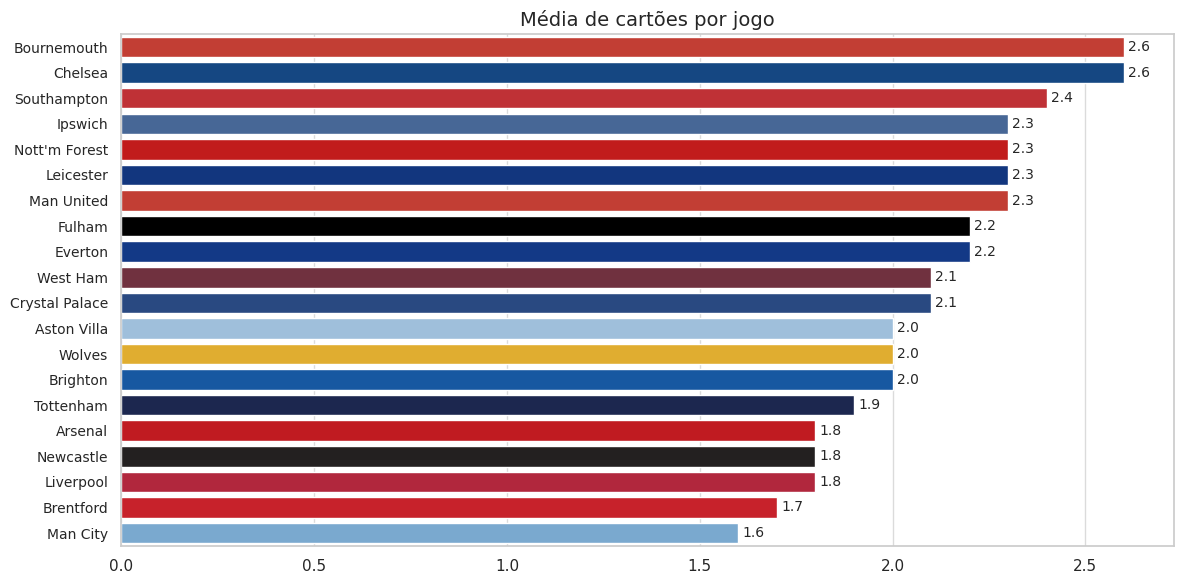

In [ ]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x='AvgCards',
    y='Team',
    hue='Team',
    data=all_cards,
    palette=TEAM_COLOR_PALETTE,
    orient='h',
    legend=False
)


plt.grid(axis='x', linestyle='-', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3, fontsize=10)

plt.title('Média de cartões por jogo', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/graficos_estatistica/media_cartoes.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# **Viradas**

In [ ]:
# Não sei se vale a pena manter esses dados, porém deixei comentado pra caso seja útil no futuro

# # Total de vitórias dos mandantes (HT)
# ht_home_victories = df[df['HTR'] == 'H'].copy()
# ht_home_victories_count = ht_home_victories.groupby('HomeTeam').size().reset_index(name='HomeVictoriesHT')
# ht_home_victories_count.index = range(1, len(ht_home_victories_count) + 1)
# ht_home_victories_count.columns = ['Team', 'HomeVictoriesHT']
# # print(ht_home_victories_count)

# # Total de vitórias dos visitantes (HT)
# ht_away_victories = df[df['HTR'] == 'A'].copy()
# ht_away_victories_count = ht_away_victories.groupby('AwayTeam').size().reset_index(name='AwayVictoriesHT')
# ht_away_victories_count.index = range(1, len(ht_away_victories_count) + 1)
# ht_away_victories_count.columns = ['Team', 'AwayVictoriesHT']
# # print(ht_away_victories_count)

# # Soma dos dois

# ht_stats = pd.merge(ht_home_victories_count, ht_away_victories_count, on='Team')
# # ht_stats['TotalVictoriesHT'] = ht_stats['HomeVictoriesHT'] + ht_stats['AwayVictoriesHT']
# # ht_stats['TotalVictoriesFT'] = all_victories['TotalVictories']


# Criando a tabela com os times

ht_stats = pd.DataFrame({
    'Team': df['HomeTeam'].unique(),
})
# print(ht_stats)


# Contando viradas em casa
viradas_casa = df[(df['HTR'] == 'A') & (df['FTR'] == 'H')].copy()
viradas_casa_count = viradas_casa.groupby('HomeTeam').size().reset_index(name='Viradas Casa')
viradas_casa_count.index = range(1, len(viradas_casa_count) + 1)
viradas_casa_count.columns = ['Team', 'Viradas Casa (entre dois tempos)']
# Outer join para pegar todos os times
ht_stats = pd.merge(ht_stats, viradas_casa_count, on='Team', how='outer')
# Substituir NaN por 0
ht_stats = ht_stats.fillna(0).astype({'Viradas Casa (entre dois tempos)': int})

# Contando viradas fora de casa
viradas_fora = df[(df['HTR'] == 'H') & (df['FTR'] == 'A')].copy()
viradas_fora_count = viradas_fora.groupby('AwayTeam').size().reset_index(name='Viradas Fora')
viradas_fora_count.index = range(1, len(viradas_fora_count) + 1)
viradas_fora_count.columns = ['Team', 'Viradas Fora (entre dois tempos)']
# Outer join para pegar todos os times
ht_stats = pd.merge(ht_stats, viradas_fora_count, on='Team', how='outer')
# Substituir NaN por 0
ht_stats = ht_stats.fillna(0).astype({'Viradas Fora (entre dois tempos)': int})

# Somando as duas
ht_stats['Viradas (entre dois tempos)'] = ht_stats['Viradas Casa (entre dois tempos)'] + ht_stats['Viradas Fora (entre dois tempos)']
ht_stats_sort = ht_stats.sort_values('Viradas (entre dois tempos)', ascending=False)
ht_stats_sort.index = range(1, len(ht_stats) + 1)
# ht_stats

# ht_stats_sort

# Plotando o gráfico das viradas

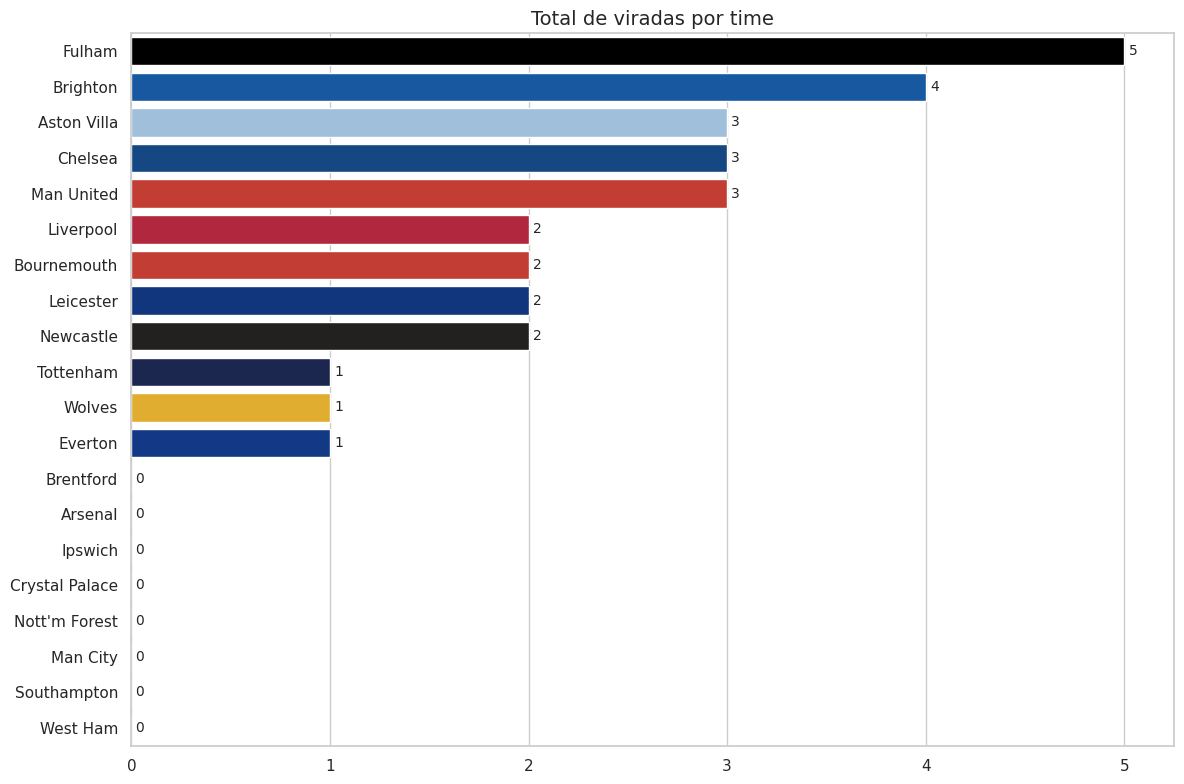

In [ ]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(
    x='Viradas (entre dois tempos)',
    y='Team',
    hue='Team',
    data=ht_stats_sort,
    palette=TEAM_COLOR_PALETTE,
    orient='h',
    legend=False
)


# plt.grid(axis='x', linestyle='-', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

plt.title('Total de viradas por time', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

**MANCHESTER UNITED**

Pontos conquistados

In [ ]:
filtro_manu_home = df['HomeTeam'] == 'Man United'
filtro_manu_away = df['AwayTeam'] == 'Man United'
df_manu = df[filtro_manu_home | filtro_manu_away].copy()
df_manu

# Pontos conquistados do United (em casa)
df_manu['Pontos em casa'] = 0
df_manu.loc[(df_manu['HomeTeam'] == 'Man United') & (df_manu['FTR'] == 'H'), 'Pontos em casa'] = 3
df_manu.loc[(df_manu['HomeTeam'] == 'Man United') & (df_manu['FTR'] == 'D'), 'Pontos em casa'] = 1

# Pontos conquistados do United (visitante)
df_manu['Pontos visitante'] = 0
df_manu.loc[(df_manu['AwayTeam'] == 'Man United') & (df_manu['FTR'] == 'A'), 'Pontos visitante'] = 3
df_manu.loc[(df_manu['AwayTeam'] == 'Man United') & (df_manu['FTR'] == 'D'), 'Pontos visitante'] = 1

# Juntando os dois
df_manu['Pontos'] = df_manu['Pontos em casa'] + df_manu['Pontos visitante']
# df_manu

In [ ]:
df_manu['Pontos'].sum()

np.int64(42)

Aproveitamento

In [ ]:
nJogos = len(df_manu)
p_possiveis = nJogos * 3
print(f'Pontos possíveis: {p_possiveis}')
print(f'Pontos conqusitados: {df_manu["Pontos"].sum()}')
print(f'Aproveitamento: {(df_manu["Pontos"].sum() / p_possiveis)*100:.2f}%')

Pontos possíveis: 114
Pontos conqusitados: 42
Aproveitamento: 36.84%


Aproveitamento como mandante e visitante

In [ ]:
# df_manu['HomeTeam'] == 'Man United'

nJogosH = len(df_manu[df_manu['HomeTeam'] == 'Man United'])
p_possiveisH = nJogosH * 3
print(f'Pontos possíveis em casa: {p_possiveisH}')
print(f'Pontos conquistados em casa: {df_manu["Pontos em casa"].sum()}')
print(f'Aproveitamento como mandante: {(df_manu["Pontos em casa"].sum() / p_possiveisH)*100:.2f}%')
print('\n\n')

nJogosA = len(df_manu[df_manu['AwayTeam'] == 'Man United'])
p_possiveisA = nJogosA * 3
print(f'Pontos possíveis como visitante: {p_possiveisA}')
print(f'Pontos conquistados como visitante: {df_manu["Pontos visitante"].sum()}')
print(f'Aproveitamento como visitante: {(df_manu["Pontos visitante"].sum() / p_possiveisA)*100:.2f}%')

Pontos possíveis em casa: 57
Pontos conquistados em casa: 24
Aproveitamento como mandante: 42.11%



Pontos possíveis como visitante: 57
Pontos conquistados como visitante: 18
Aproveitamento como visitante: 31.58%
